In [4]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import datetime

In [2]:
def load_cdf(path):
    '''
    INPUT: Path to netCDF file
    OUTPUT: times, lats, lons, hgt
    '''
    fh = Dataset(path, mode='r')
    
    lons = fh.variables['lon'][:].data
    lats = fh.variables['lat'][:].data
    times = fh.variables['time'][:].data
    times = times - times[0]
    hgt = fh.variables['hgt'][:].data
    
    return times, lats, lons, hgt

In [ ]:
def get_hgt(day,level,US_focus=True):
    new_hgt = hgt[day-1,level-1]
    std_hgts = (new_hgt - new_hgt.min())/(new_hgt.max()-new_hgt.min())
    lat_mask = ((lats>=20) & (lats<=60)) # Originally 20 -60
    
    trunc_lats = lats[lat_mask]

    lon_mask = ((lons>=220) & (lons<=340)) # Originally 240 -340
    trunc_lons = lons[lon_mask]

    start_lat = np.argwhere(lat_mask).min()
    end_lat = np.argwhere(lat_mask).max()

    start_lon = np.argwhere(lon_mask).min()
    end_lon = np.argwhere(lon_mask).max()

In [96]:
class CDF():
    def __init__(self,path):
        self.path = path
        self.retrieve_data()    
        self.localize()
    
    
    def __str__(self):
        return str(self.year) +'\nTimes: '+str(len(self.times))+'\nLevels: '+str(self.hgts.shape[1])
    
    
    def retrieve_data(self):
        self.year = int(self.path.split('.')[-2])
        fh = Dataset(self.path, mode='r')
        self.lons = fh.variables['lon'][:].data
        self.lats = fh.variables['lat'][:].data
        times = fh.variables['time'][:].data
        self.times = times - times[0]
        self.hgts = fh.variables['hgt'][:].data
    
    
    def localize(self,lat0=20,lat1=70,lon0=220,lon1=340): # Default US localization
        lat_mask = ((self.lats>=lat0) & (self.lats<=lat1)) # Originally 20 - 60
        self.loc_lats = self.lats[lat_mask]

        lon_mask = ((self.lons>=lon0) & (self.lons<=lon1)) # Originally 240 - 340
        self.loc_lons = self.lons[lon_mask]

        start_lat = np.argwhere(lat_mask).min()
        end_lat = np.argwhere(lat_mask).max()

        start_lon = np.argwhere(lon_mask).min()
        end_lon = np.argwhere(lon_mask).max()
        
        self.loc_hgts = self.hgts[:,:,start_lat:end_lat+1,start_lon:end_lon+1]
        
    
    def plot(self, day=1, level=1, loc=False, contours=None, figsize=(6.4,4.8),cmap='RdBu_r', norm=True, date=None):
        
        if date: # Date input as (Month,Day) numerical tuple
            day = datetime.datetime(self.year,*date).timetuple().tm_yday # for date to day
        
        plt.figure(figsize=figsize)
        ax = plt.axes(projection=ccrs.PlateCarree())
        
        if loc:
            hgts = self.loc_hgts[day-1,level-1,:,:]
            lons = self.loc_lons
            lats = self.loc_lats
        else:
            hgts = self.hgts[day-1,level-1,:,:]
            lons = self.lons
            lats = self.lats
        if norm:
            hgts = (hgts-hgts.min())/(hgts.max()-hgts.min())
        if contours:
            cs = plt.contour(lons,lats,hgts, levels=contours, transform =ccrs.PlateCarree())
            
        date = (datetime.datetime(self.year, 1, 1) + datetime.timedelta(day - 1)).strftime(r'%b %d %Y')
        title_str = str(date)+' : Level '+str(level)
        ax.set_title(title_str)
        
        plt.contourf(lons, lats, hgts, 200, transform=ccrs.PlateCarree(),cmap=cmap)
        ax.coastlines()
        plt.colorbar(orientation='horizontal',pad=0.03)
        plt.show()

In [97]:
cdf = CDF("E:\hgt.2012.nc")

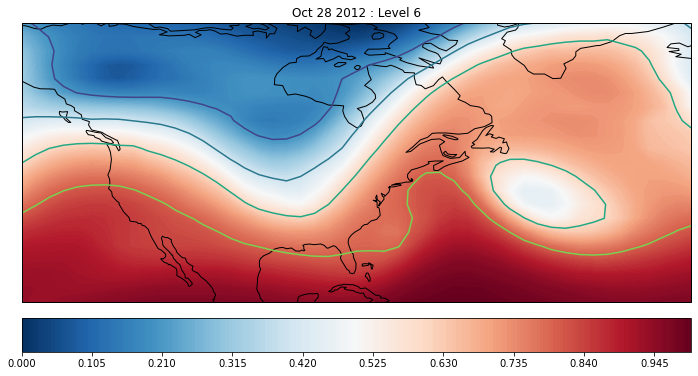

In [98]:
cdf.plot(date=(10,28), level=6, loc=True, figsize=(12,10), norm=True, contours=5)

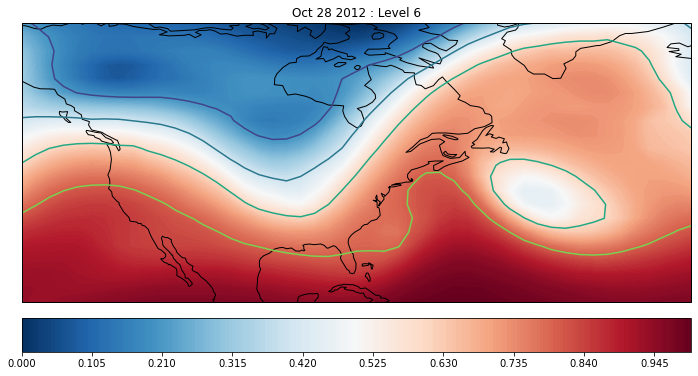

In [84]:
cdf.plot(date=(10,28), level=6, loc=True, figsize=(12,10), norm=True, contours=5)

In [42]:
k2 = CDF("E:\hgt.2012.nc")

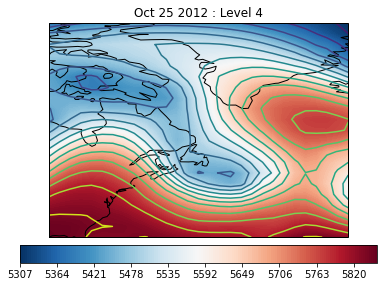

In [72]:
k2.localize(lat0=30,lat1=80,lon0=270,lon1=340)
k2.plot(date=(10,25),level=4,loc=True, contours=15, norm=False)

In [64]:
lons = k2.loc_lons
lats = k2.loc_lats
hgts = k2.loc_hgts
hgts.shape

(366, 12, 21, 29)

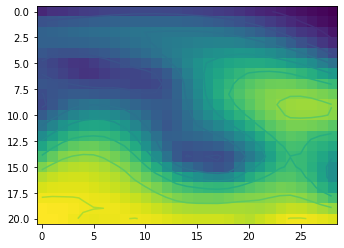

In [77]:
date = (10,25)
level = 4
day = datetime.datetime(2012,*date).timetuple().tm_yday
plt.imshow(hgts[day-1,level-1])
plt.contour(hgts[day-1,level-1])